In [1]:
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SIZES = [100, 1000, 10000, 100000, 1000000, 5000000, 10000000]

In [3]:
def toData(dataSets, f, s):
    data =[]
    for i in range(len(SIZES)):
        dataSet = np.asarray(dataSets[f + str(SIZES[i]) + s]['runtimes'])
        average = np.average(dataSet)
        data.append(average)
    return [np.asarray(SIZES),np.asarray(data)]

In [4]:
def speedup(seq,mul):
    return [seq[0],seq[1] / mul[1]]

In [5]:
def plotBench(seq,mul,speed,l1,l2,l3):

    fig, ax1 = plt.subplots()
    
    lns0 = ax1.plot(seq[0],seq[1], color='green',label=l1)
    lns1 = ax1.plot(mul[0],mul[1], color='blue', label=l2)
    
    ax1.set_ylabel('Runtime (ms)')
    ax1.set_xlabel('input size')
    ax1.set_xscale('log')
    
    
    
    ax2 = ax1.twinx()
    lns2 = ax2.plot(speed[0],speed[1], color='black',label=l3)
    ax2.set_ylabel('Speedup')

    leg = lns0 + lns1 + lns2
    labs = [l.get_label() for l in leg]
    ax1.legend(leg, labs, loc=0)
        
    
    plt.show()
    

In [6]:
def plot(ex, f, s): 
    data_c = pd.read_json(ex+"_c.json")
    data_mul = pd.read_json(ex+"_multicore.json")

    seq = toData(data_c[ex+'.fut']['datasets'], f,s)
    mul = toData(data_mul[ex+'.fut']['datasets'], f,s)
    speed = speedup(seq,mul)
    plotBench(seq,mul,speed,"sequential runtime","multicore runtime","multicore speedup")






In [21]:
def plotComp(ex1, f1, s1, ex2, f2, s2, beackend):

    data1 = pd.read_json(ex1+"_"+beackend+".json")
    data2 = pd.read_json(ex2+"_"+beackend+".json")
    
    seq1 = toData(data1[ex1+'.fut']['datasets'], f1,s1)
    seq2 = toData(data2[ex2+'.fut']['datasets'], f2,s2)
    
    speed = speedup(seq2,seq1)
    
    plotBench(seq1,seq2,speed,"segmented runtime", "built-in runtime", "segmented speedup")
    
    

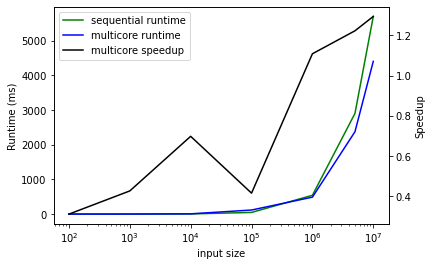

In [22]:
plot('e11', 'two_', '_i32s')

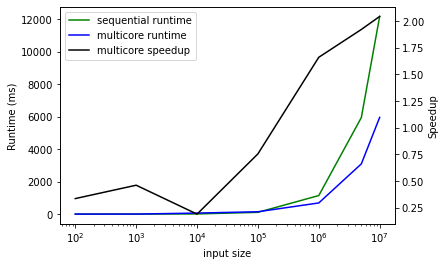

In [23]:
plot('e13', 'two_', '_i32s')

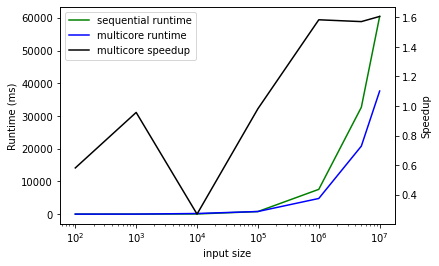

In [24]:
plot('e21', 'i32_', '_bools')

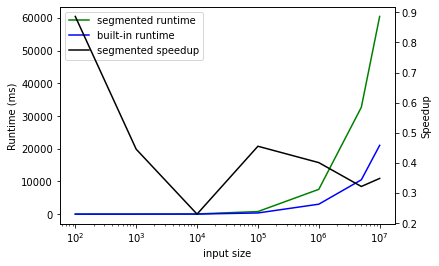

In [25]:
plotComp('e21', 'i32_', '_bools', 'eb21', 'one_', '_i32s','c')

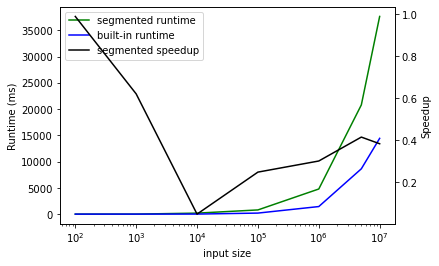

In [26]:
plotComp('e21', 'i32_', '_bools', 'eb21', 'one_', '_i32s','multicore')

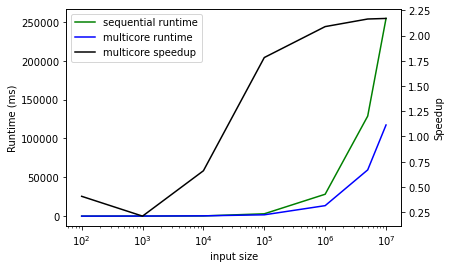

In [27]:
plot('e22', 'i32_', '_bools')

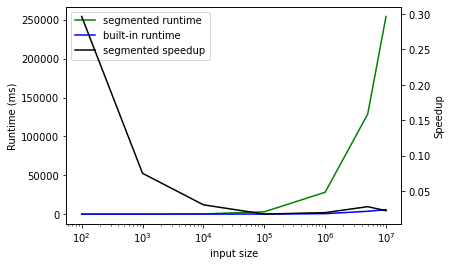

In [28]:
plotComp('e22', 'i32_', '_bools', 'eb22', 'one_', '_i32s','c')

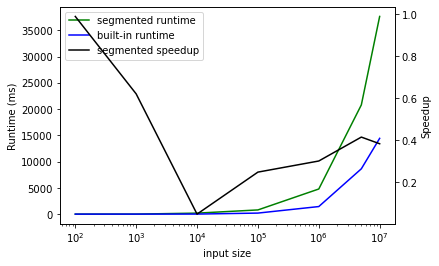

In [29]:
plotComp('e21', 'i32_', '_bools', 'eb21', 'one_', '_i32s','multicore')